#Projeto 1 - Redes Neurais
###Professor: Germano Vasconselos


---


Alunos:
<br>
Felipe Jun Ting Lin - fjtl2@cin.ufpe.br
<br>
João Gabriel Vasconcelos - jgav@cin.ufpe.br
<br>
Maria Eduarda Mota - mebm@cin.ufpe.br
<br>
Rafael Bernardo Nunes Neto - rbnn@cin.ufpe.br

# Mini-projeto: Reconhecimento de Dígitos com MLPs

Para a implementação do reconhecedor de dígitos, utilizamos Tensorflow e Keras, além da biblioteca Numpy para operações matemáticas e Scikit-Learn para funções de métricas de avaliação.



#### O que entregar?

Taxas de acerto (acurácia por classe e total) com variação de parâmetros (tamanho da rede, taxa de aprendizagem, função de ativação), buscando ganhos de desempenho

### Atribuição dos valores estudados

Escolhemos a seguinte variação de valores a fim de analisar o desempenho do reconhecedor de dígitos

#### MLP
- Tamanho da rede: [1 - 5]
- Taxa de aprendizagem: [0.1 - 0.7]
- Função de ativação: [relu, softmax, tanh, sigmoid]
- Algoritmo de aprendizagem: [adam, rmsprop, sgd]
- Dropout: [0.2 - 0.7]



## Importando biblioteas e tratando os dados

### Importações

In [ ]:
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [ ]:
#Biblioteca de plot
import matplotlib.pyplot as plt

### Fazendo download do banco de dados MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Parâmetros e hiperparâmetros

Principais parâmetros que serão utilizados na normalização dos dados e em seu treinamento.

In [ ]:
input_shape = x_train[0].shape # Formato de entrada a ser aceito pela primeira camada dos modelos
num_class = 10 # Numero de classes existentes no dataset
batch_size = 32 # Numero de amostras por iteração de treinamento
epochs = 10 # Numero de vezes que o modelo treinara no conjunto completo de treinamento
val_split = 0.3 # Porcentagem do conjunto de treino a ser usado para a validacao
verbose = 0 # parametro para modificar os detalhes a serem mostrados durante o treinamento

### Normalização dos dados


- A fim de garantir uma consistência na dimensão dos dados, fazemos uma normalização (dividimos os valores por $255$, devido ao intervalo dos valores).

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))/255.
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))/255.

### Categorização das labels

Utilizamos a função `to_categorical`, importada do Keras, a fim de transformar os valores possíveis contidos nas amostras em valorações categóricas contendo 0 ou 1 ao final da rede. Desse modo, devemos ter 10 categorias de output.

In [ ]:
y_train = to_categorical(y_train, num_class)
y_test = to_categorical(y_test, num_class)

## Matriz de confusão e gráficos

In [ ]:
def historyPlot(model, history_dict, y_test):
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  accuracy = history_dict['accuracy']
  val_accuracy = history_dict['val_accuracy']
  
  epochs = range(1, len(loss_values) + 1)
  fig, ax = plt.subplots(1, 2, figsize=(14, 6))

  ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
  ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  ax[0].set_title('Training & Validation Accuracy', fontsize=16)
  ax[0].set_xlabel('Epochs', fontsize=16)
  ax[0].set_ylabel('Accuracy', fontsize=16)
  ax[0].legend()

  ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
  ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
  ax[1].set_title('Training & Validation Loss', fontsize=16)
  ax[1].set_xlabel('Epochs', fontsize=16)
  ax[1].set_ylabel('Loss', fontsize=16)
  ax[1].legend()
  
  y_test_argmax = np.argmax(y_test, axis=1) 
  y_pred = model.predict(x_test)
  y_pred_argmax = np.argmax(y_pred, axis=1)
  print(classification_report(y_test_argmax, y_pred_argmax))
  
  cm = confusion_matrix(y_test_argmax, y_pred_argmax, labels = np.unique(y_test_argmax))
  cmd = ConfusionMatrixDisplay(cm, display_labels = np.unique(y_test_argmax))
  cmd.plot()
  plt.show()

  var = cm.diagonal()/cm.sum(axis=1) 
  print("Accuracy")
  _ = [print( "Label " + str(i) + (": {percentage:.2f} %").format(percentage=100*var[i])) for i in range(len(var))]

## Estudo MLP

### Tamanho da rede
#### Valores a serem testados: $1$, $2$, $3$, $4$, e $5$ camadas

Primeiramente iremos analisar a influência do tamanho da rede na acurácia e no loss do modelo.

Criamos $5$ modelos:
 

1.   Camada densa com $10$ unidades (número de classes)
2.   Camada densa com $128$ unidades $+$ camada densa com $10$ unidades (número de classes)
3.   Camada densa com $256$ unidades $+$ camada densa com $128$ unidades $+$ camada densa com $10$ unidades (número de classes)
4.   Camada densa com $256$ unidades $+$ camada densa com $128$ unidades $+$ camada densa com $64$ unidades $+$ camada densa com $10$ unidades (número de classes)
4.   Camada densa com $512$ unidades $+$ camada densa com $256$ unidades $+$ camada densa com $128$ unidades $+$ camada densa com $64$ unidades $+$ camada densa com $10$ unidades (número de classes)



In [ ]:
model_MLP_1 = keras.Sequential([
     keras.Input(shape=input_shape), 
     layers.Flatten(),
     layers.Dense(num_class, activation = 'softmax')                     
])

In [ ]:
model_MLP_2 = keras.Sequential([
     keras.Input(shape=input_shape), 
     layers.Flatten(),
     layers.Dense(128, activation = 'softmax'), 
     layers.Dense(num_class, activation = 'softmax')                     
])

In [ ]:
model_MLP_3 = keras.Sequential([
     keras.Input(shape=input_shape), 
     layers.Flatten(),
     layers.Dense(256, activation = 'softmax'), 
     layers.Dense(128, activation = 'softmax'), 
     layers.Dense(num_class, activation = 'softmax')                     
])

In [ ]:
model_MLP_4 = keras.Sequential([
     keras.Input(shape=input_shape), 
     layers.Flatten(),
     layers.Dense(256, activation = 'softmax'), 
     layers.Dense(128, activation = 'softmax'), 
     layers.Dense(64, activation = 'softmax'), 
     layers.Dense(num_class, activation = 'softmax')                     
])

In [ ]:
model_MLP_5 = keras.Sequential([
     keras.Input(shape=input_shape), 
     layers.Flatten(),
     layers.Dense(512, activation = 'softmax'),
     layers.Dense(256, activation = 'softmax'), 
     layers.Dense(128, activation = 'softmax'), 
     layers.Dense(64, activation = 'softmax'), 
     layers.Dense(num_class, activation = 'softmax')                     
])

In [ ]:
def networkAnalysis(model,x_train = x_train,shape = input_shape,num_class = num_class, y_train = y_train, x_test = x_test, y_test = y_test, batch_size = batch_size,epochs = epochs, validation_split = val_split, verbose = verbose):
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
  history_model = model.fit(x_train, y_train, batch_size = batch_size, validation_split = val_split, epochs = epochs, verbose = verbose)
  eval = model.evaluate(x_test, y_test)
  print(("Loss: {percentage:.2f}").format(percentage=eval[0]))
  print(("Accuracy:  {percentage:.2f} %").format(percentage=100*(eval[1])))
  historyPlot(model, history_model.history, y_test)

MODEL 1
313/313 [==============================] - 0s 1ms/step - loss: 0.2693 - accuracy: 0.9233
Loss: 0.27
Accuracy:  92.33 %
313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.89      0.92      0.90      1010
           4       0.91      0.95      0.93       982
           5       0.88      0.88      0.88       892
           6       0.94      0.95      0.94       958
           7       0.94      0.91      0.93      1028
           8       0.87      0.88      0.88       974
           9       0.93      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



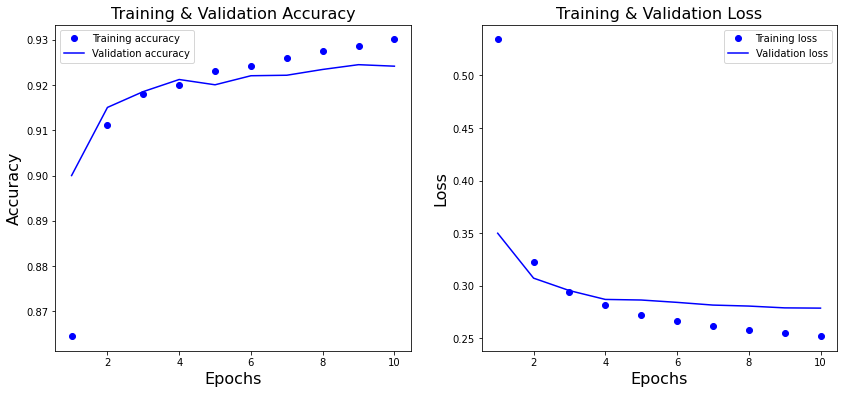

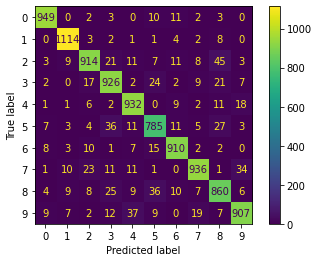

Accuracy
Label 0: 96.84 %
Label 1: 98.15 %
Label 2: 88.57 %
Label 3: 91.68 %
Label 4: 94.91 %
Label 5: 88.00 %
Label 6: 94.99 %
Label 7: 91.05 %
Label 8: 88.30 %
Label 9: 89.89 %
MODEL 2
313/313 [==============================] - 1s 2ms/step - loss: 0.3257 - accuracy: 0.9171
Loss: 0.33
Accuracy:  91.71 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.92      0.92      1032
           3       0.90      0.89      0.90      1010
           4       0.88      0.93      0.91       982
           5       0.92      0.89      0.91       892
           6       0.93      0.96      0.95       958
           7       0.90      0.92      0.91      1028
           8       0.87      0.90      0.88       974
           9       0.89      0.80      0.84      1009

    accuracy                           0.92

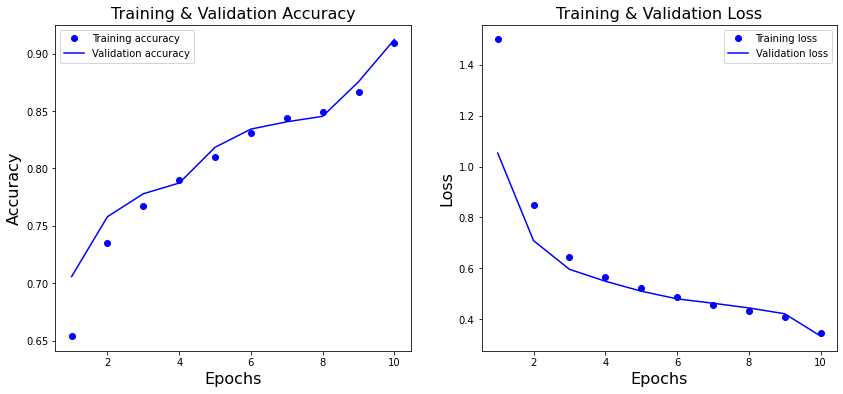

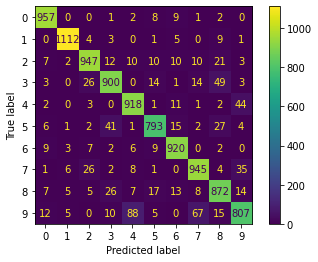

Accuracy
Label 0: 97.65 %
Label 1: 97.97 %
Label 2: 91.76 %
Label 3: 89.11 %
Label 4: 93.48 %
Label 5: 88.90 %
Label 6: 96.03 %
Label 7: 91.93 %
Label 8: 89.53 %
Label 9: 79.98 %
MODEL 3
313/313 [==============================] - 1s 2ms/step - loss: 0.3219 - accuracy: 0.9215
Loss: 0.32
Accuracy:  92.15 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.99      0.98      1135
           2       0.93      0.92      0.93      1032
           3       0.89      0.86      0.88      1010
           4       0.94      0.95      0.94       982
           5       0.90      0.92      0.91       892
           6       0.97      0.93      0.95       958
           7       0.96      0.92      0.94      1028
           8       0.81      0.83      0.82       974
           9       0.89      0.91      0.90      1009

    accuracy                           0.92

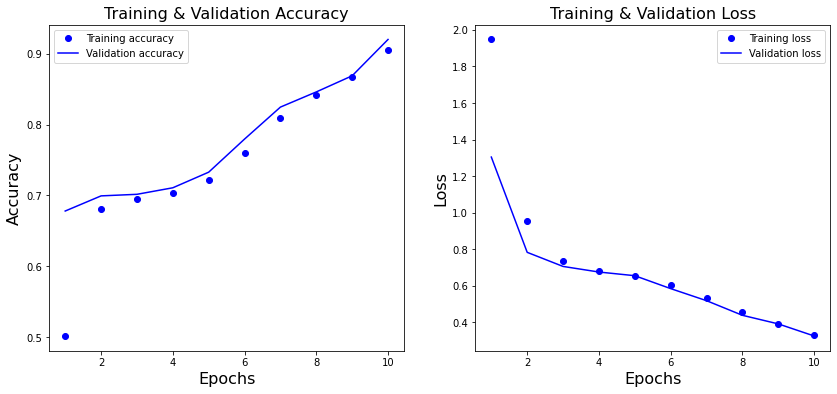

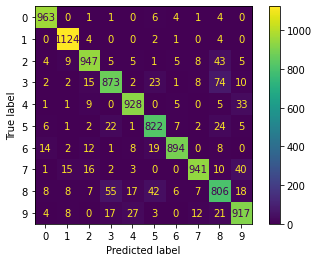

Accuracy
Label 0: 98.27 %
Label 1: 99.03 %
Label 2: 91.76 %
Label 3: 86.44 %
Label 4: 94.50 %
Label 5: 92.15 %
Label 6: 93.32 %
Label 7: 91.54 %
Label 8: 82.75 %
Label 9: 90.88 %
MODEL 4
313/313 [==============================] - 2s 5ms/step - loss: 0.8484 - accuracy: 0.6079
Loss: 0.85
Accuracy:  60.79 %
313/313 [==============================] - 2s 6ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.54      0.96      0.69       980
           1       0.98      0.98      0.98      1135
           2       0.86      0.89      0.88      1032
           3       0.53      0.94      0.68      1010
           4       0.00      0.00      0.00       982
           5       0.92      0.10      0.18       892
           6       0.74      0.15      0.25       958
           7       0.34      0.93      0.50      1028
           8       0.93      0.93      0.93       974
           9       0.33      0.06      0.10      1009

    accuracy                           0.61     10000
   macro avg       0.62      0.59      0.52     10000
weighted avg       0.62      0.61      0.53     10000



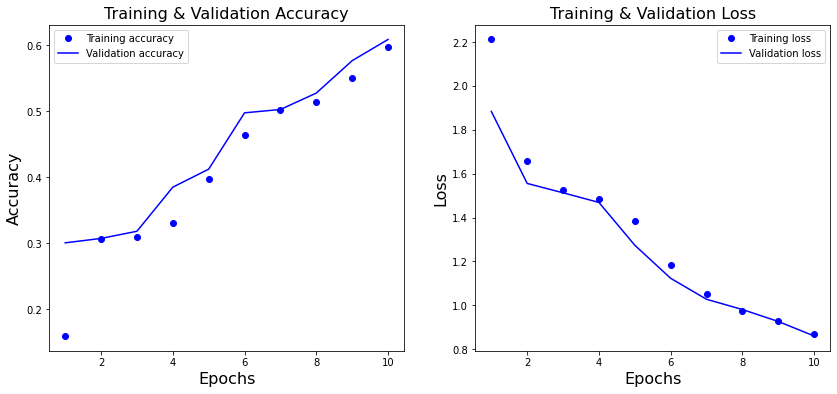

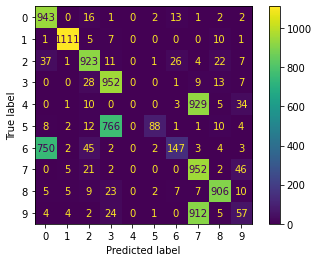

Accuracy
Label 0: 96.22 %
Label 1: 97.89 %
Label 2: 89.44 %
Label 3: 94.26 %
Label 4: 0.00 %
Label 5: 9.87 %
Label 6: 15.34 %
Label 7: 92.61 %
Label 8: 93.02 %
Label 9: 5.65 %
MODEL 5
313/313 [==============================] - 1s 3ms/step - loss: 2.3013 - accuracy: 0.1135
Loss: 2.30
Accuracy:  11.35 %
313/313 [==============================] - 1s 3ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



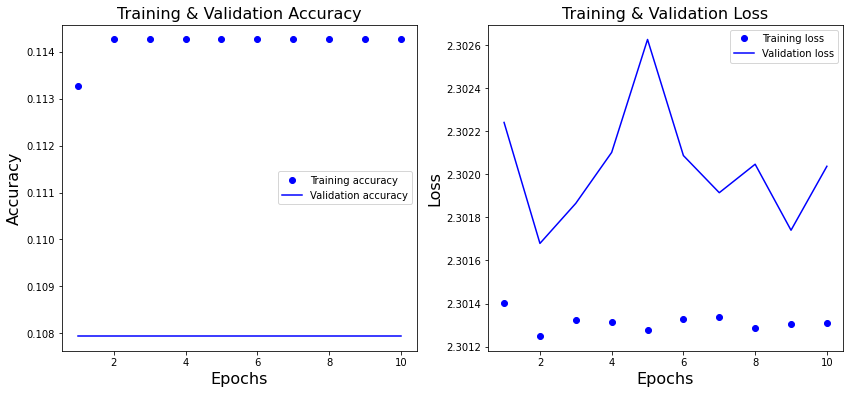

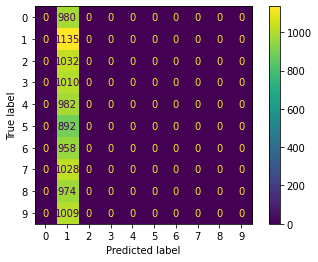

Accuracy
Label 0: 0.00 %
Label 1: 100.00 %
Label 2: 0.00 %
Label 3: 0.00 %
Label 4: 0.00 %
Label 5: 0.00 %
Label 6: 0.00 %
Label 7: 0.00 %
Label 8: 0.00 %
Label 9: 0.00 %


In [ ]:
model_list = [model_MLP_1, model_MLP_2, model_MLP_3, model_MLP_4, model_MLP_5]
for i in range (5):
  print("MODEL {i}".format(i = i+1))
  networkAnalysis(model_list[i])
  print('------------------------------------------------------------------------------------')

###Análise de resultados

Pode-se observar que, à medida que aumentamos o número de camadas, temos uma menor acurácia do modelo. 
Esse comportamento pode ser explicado pelo fato de que um número elevado de camadas intermediárias podem causar um overfitting (o valor da Loss Function que aumenta é um indicador de overfitting também).



Para todos os modelos a seguir, fazendo o "tuning"  dos parâmetros a fim de otimizar a perfomance com o otimizador Adam, a métrica acurácia e a função de perda `categorical_crossentropy`, visto que nossa saída é categórica (possuindo 10 classes).

### Taxa de aprendizagem
#### [0.1, 0.2, 0.05, 0.009, 0.007, 0.005]

Analisaremos agora o impacto da taxa de aprendizagem, para isso compilaremos o  $2°$ modelo básico descrito na seção anterior $6$ vezes modificando a taxa de aprendizagem de acordo com os resultados de cada fase do experimento.

* Valores a serem testados: 0.1, 0.2, 0.05, 0.009, 0.007, 0.005

In [ ]:
def learning_rate_Analysis(model, lr, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test, batch_size = batch_size,epochs = epochs, validation_split = val_split, verbose = verbose):
  model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate = lr), metrics = 'accuracy')
  history_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = val_split, verbose = verbose)
  eval = model.evaluate(x_test, y_test)
  print("To Learning rate = ",lr," :")
  print(("Loss: {percentage:.2f}").format(percentage=eval[0]))
  print(("Accuracy: {percentage:.2f} %").format(percentage=100*(eval[1])))
  historyPlot(model, history_model.history, y_test)


Learning Rate: 0.1
313/313 [==============================] - 1s 2ms/step - loss: 0.5643 - accuracy: 0.8222
To Learning rate =  0.1  :
Loss: 0.56
Accuracy: 82.22 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       980
           1       0.98      0.98      0.98      1135
           2       0.90      0.90      0.90      1032
           3       0.93      0.88      0.91      1010
           4       0.00      0.00      0.00       982
           5       0.92      0.76      0.84       892
           6       0.93      0.93      0.93       958
           7       0.90      0.92      0.91      1028
           8       0.79      0.93      0.86       974
           9       0.47      0.91      0.62      1009

    accuracy                           0.82     10000
   macro avg       0.78      0.82      0.79     10000
weighted avg       0.78      0.82      0.79     10000



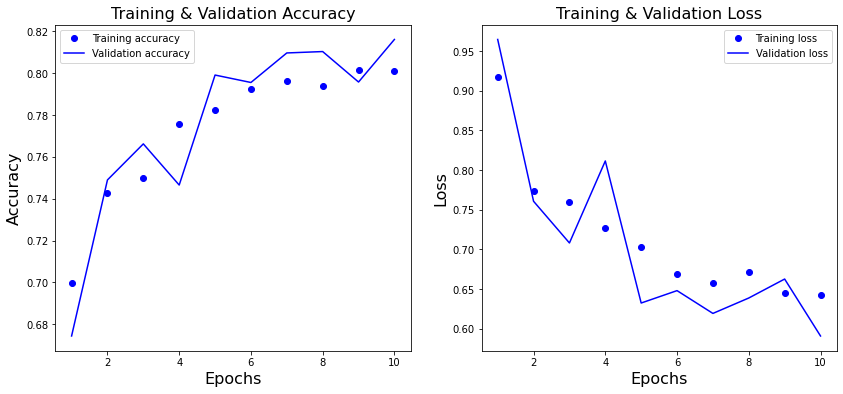

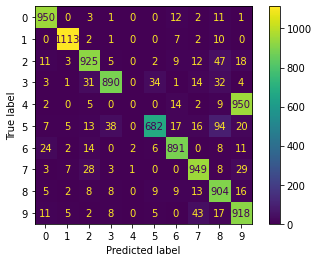

Accuracy
Label 0: 96.94 %
Label 1: 98.06 %
Label 2: 89.63 %
Label 3: 88.12 %
Label 4: 0.00 %
Label 5: 76.46 %
Label 6: 93.01 %
Label 7: 92.32 %
Label 8: 92.81 %
Label 9: 90.98 %
------------------------------------------------------------------------------------
Learning Rate: 0.2
313/313 [==============================] - 1s 2ms/step - loss: 0.7664 - accuracy: 0.7346
To Learning rate =  0.2  :
Loss: 0.77
Accuracy: 73.46 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       980
           1       0.93      0.98      0.96      1135
           2       0.78      0.90      0.83      1032
           3       0.80      0.90      0.85      1010
           4       0.46      0.95      0.62       982
           5       0.33      0.00      0.00       892
           6       0.90      0.88      0.89       958
           7       0.93      0.87      0.90      1028
           8       0.51      0.

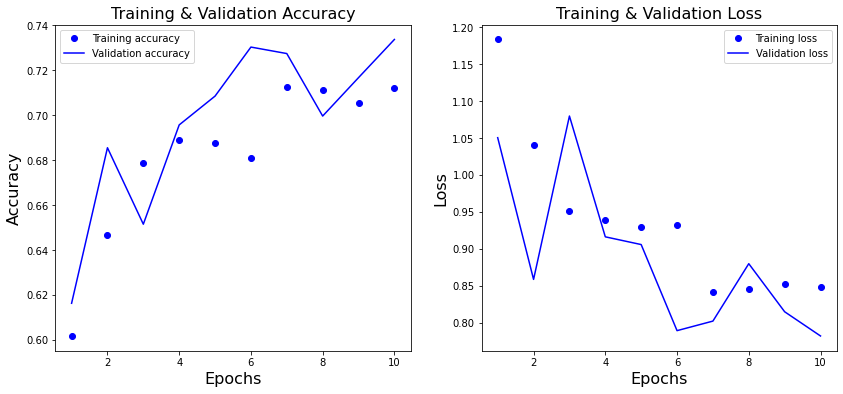

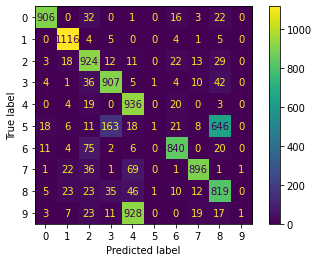

Accuracy
Label 0: 92.45 %
Label 1: 98.33 %
Label 2: 89.53 %
Label 3: 89.80 %
Label 4: 95.32 %
Label 5: 0.11 %
Label 6: 87.68 %
Label 7: 87.16 %
Label 8: 84.09 %
Label 9: 0.10 %
------------------------------------------------------------------------------------
Learning Rate: 0.05
313/313 [==============================] - 1s 2ms/step - loss: 0.5322 - accuracy: 0.8294
To Learning rate =  0.05  :
Loss: 0.53
Accuracy: 82.94 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.92      0.89      0.90      1032
           3       0.88      0.91      0.89      1010
           4       0.47      0.98      0.64       982
           5       0.85      0.92      0.88       892
           6       0.93      0.94      0.94       958
           7       0.91      0.91      0.91      1028
           8       0.93      0

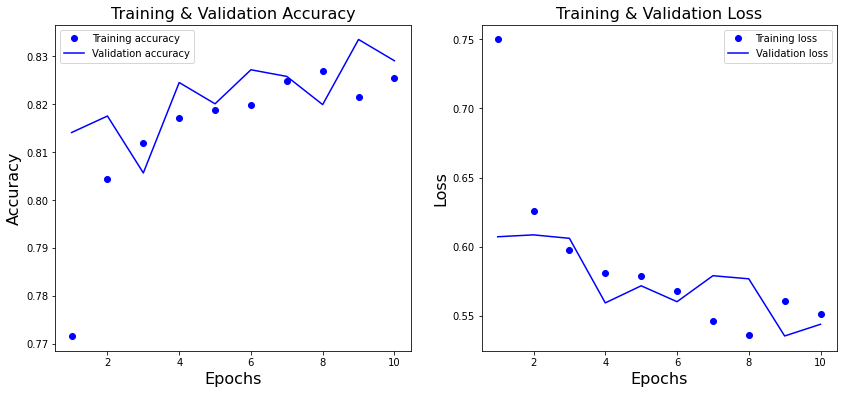

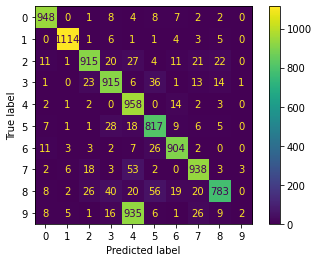

Accuracy
Label 0: 96.73 %
Label 1: 98.15 %
Label 2: 88.66 %
Label 3: 90.59 %
Label 4: 97.56 %
Label 5: 91.59 %
Label 6: 94.36 %
Label 7: 91.25 %
Label 8: 80.39 %
Label 9: 0.20 %
------------------------------------------------------------------------------------
Learning Rate: 0.009
313/313 [==============================] - 1s 2ms/step - loss: 0.2685 - accuracy: 0.9423
To Learning rate =  0.009  :
Loss: 0.27
Accuracy: 94.23 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.99      0.96      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.91      0.94      0.92      1010
           4       0.95      0.93      0.94       982
           5       0.94      0.90      0.92       892
           6       0.96      0.94      0.95       958
           7       0.95      0.96      0.95      1028
           8       0.87    

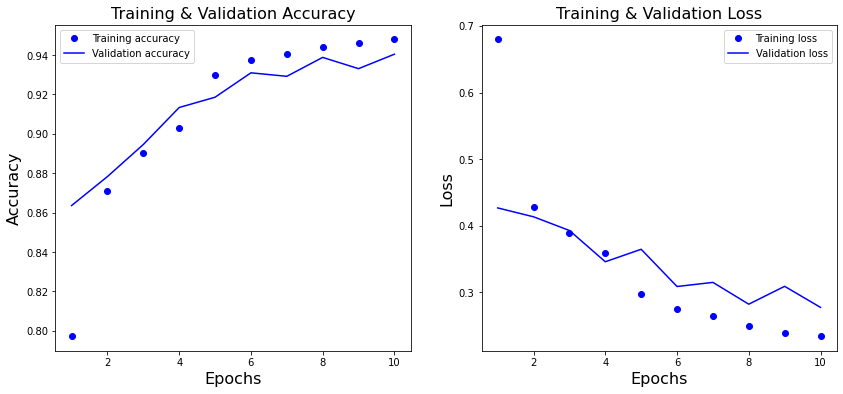

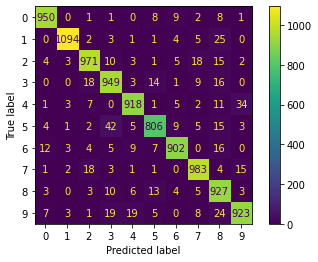

Accuracy
Label 0: 96.94 %
Label 1: 96.39 %
Label 2: 94.09 %
Label 3: 93.96 %
Label 4: 93.48 %
Label 5: 90.36 %
Label 6: 94.15 %
Label 7: 95.62 %
Label 8: 95.17 %
Label 9: 91.48 %
------------------------------------------------------------------------------------
Learning Rate: 0.007
313/313 [==============================] - 1s 2ms/step - loss: 0.2659 - accuracy: 0.9428
To Learning rate =  0.007  :
Loss: 0.27
Accuracy: 94.28 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.93      0.93      1032
           3       0.93      0.93      0.93      1010
           4       0.97      0.90      0.93       982
           5       0.94      0.90      0.92       892
           6       0.98      0.94      0.96       958
           7       0.95      0.96      0.96      1028
           8       0.90   

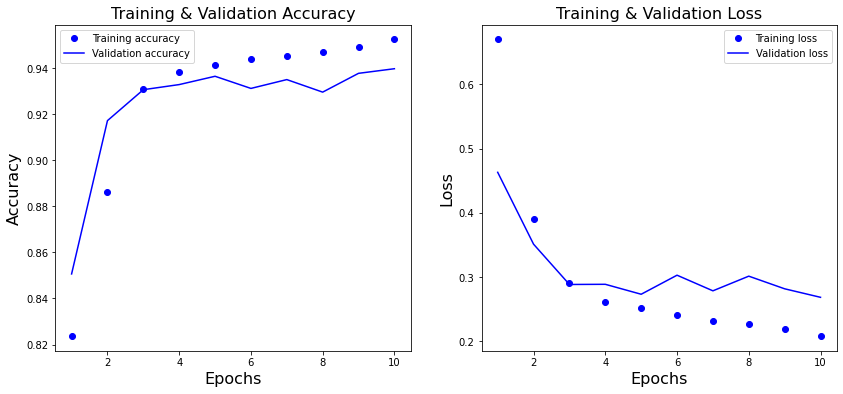

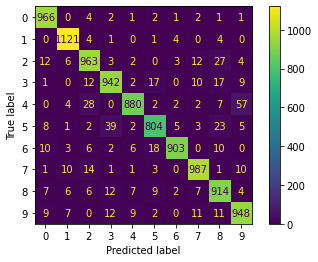

Accuracy
Label 0: 98.57 %
Label 1: 98.77 %
Label 2: 93.31 %
Label 3: 93.27 %
Label 4: 89.61 %
Label 5: 90.13 %
Label 6: 94.26 %
Label 7: 96.01 %
Label 8: 93.84 %
Label 9: 93.95 %
------------------------------------------------------------------------------------
Learning Rate: 0.005
313/313 [==============================] - 1s 2ms/step - loss: 0.2470 - accuracy: 0.9404
To Learning rate =  0.005  :
Loss: 0.25
Accuracy: 94.04 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.95      0.93      0.94      1032
           3       0.93      0.89      0.91      1010
           4       0.97      0.89      0.93       982
           5       0.92      0.94      0.93       892
           6       0.96      0.96      0.96       958
           7       0.96      0.95      0.95      1028
           8       0.91   

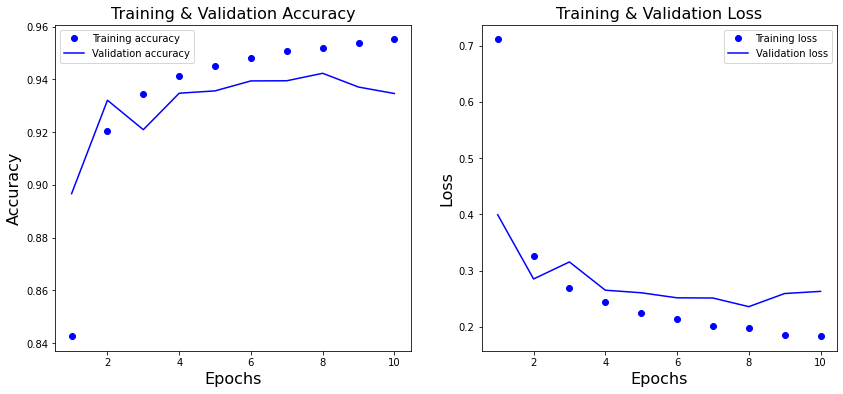

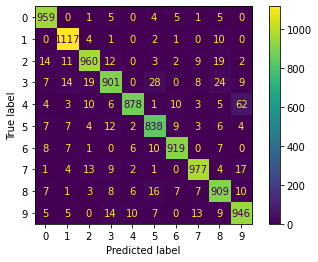

Accuracy
Label 0: 97.86 %
Label 1: 98.41 %
Label 2: 93.02 %
Label 3: 89.21 %
Label 4: 89.41 %
Label 5: 93.95 %
Label 6: 95.93 %
Label 7: 95.04 %
Label 8: 93.33 %
Label 9: 93.76 %
------------------------------------------------------------------------------------


In [ ]:
lr_list = [0.1, 0.2, 0.05, 0.009, 0.007, 0.005]
for i in range(6):
  print("Learning Rate: {lr}".format(lr = lr_list[i]))
  learning_rate_Analysis(keras.Sequential([
     keras.Input(shape=input_shape), 
     layers.Flatten(),
     layers.Dense(128, activation = 'softmax'),
     layers.Dense(num_class, activation = 'softmax')                     
]), lr_list[i])
  print('------------------------------------------------------------------------------------')
 

###Análise de resultados

Pelos resultados obtidos, pode-se dizer que uma taxa de aprendizado maior (0.1 por exemplo) tende a causar um overshooting, em que a função $Loss$ não consegue convergir para um ponto *ótimo*, sempre ultrapassando tal ponto. Nesse quesito, a utilização de uma taxa menor, como 0.007, proveu uma melhor acurácia.



### Função de ativação
#### Relu, Sigmoid, Softmax, Tanh 

Nessa sessão, alteramos as funções de ativação na(s) camada(s) intemediária(s) a fim de analisar o modelo e alavancar uma possível melhora em sua perfomance, não alterando a ativação softmax na camada de saída.

In [ ]:
def activationFunctionExperiment(activationFunction,x_train = x_train,shape = input_shape,num_class = num_class, y_train = y_train, x_test = x_test, y_test = y_test, batch_size = batch_size,epochs = epochs, validation_split = val_split, verbose = verbose):
  model = keras.Sequential([
     keras.Input(shape=input_shape), 
     layers.Flatten(),
     layers.Dense(128, activation = activationFunction),
     layers.Dense(num_class, activation = 'softmax')])
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
  history_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = val_split, verbose = verbose)
  eval = model.evaluate(x_test, y_test)
  print("To activation fuction = ", activationFunction, " :")
  print(("Loss: {percentage:.2f}").format(percentage=eval[0]))
  print(("Accuracy:  {percentage:.2f} %").format(percentage=100*(eval[1])))
  historyPlot(model, history_model.history, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.0954 - accuracy: 0.9747
To activation fuction =  relu  :
Loss: 0.10
Accuracy:  97.47 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



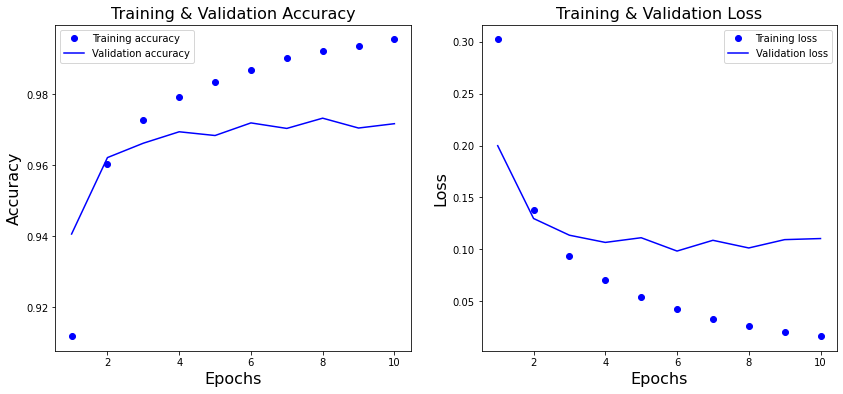

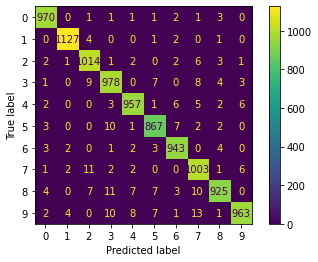

Accuracy
Label 0: 98.98 %
Label 1: 99.30 %
Label 2: 98.26 %
Label 3: 96.83 %
Label 4: 97.45 %
Label 5: 97.20 %
Label 6: 98.43 %
Label 7: 97.57 %
Label 8: 94.97 %
Label 9: 95.44 %
------------------------------------------------------------------------------------
313/313 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9727
To activation fuction =  sigmoid  :
Loss: 0.09
Accuracy:  97.27 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.97      0.97       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      

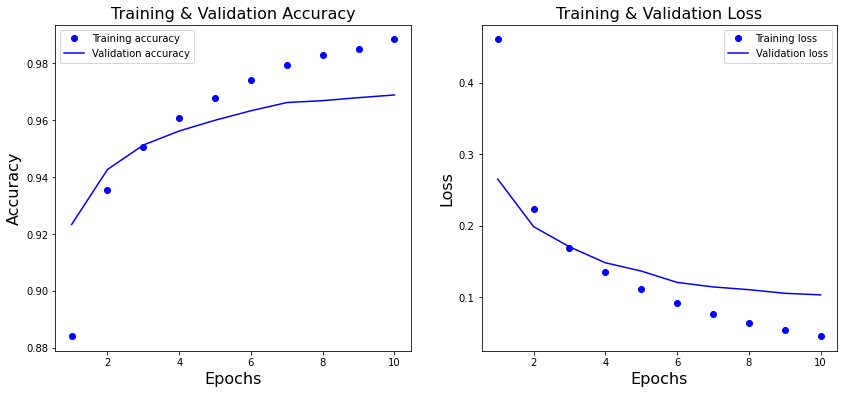

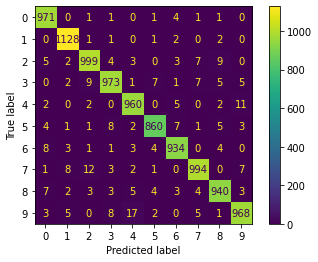

Accuracy
Label 0: 99.08 %
Label 1: 99.38 %
Label 2: 96.80 %
Label 3: 96.34 %
Label 4: 97.76 %
Label 5: 96.41 %
Label 6: 97.49 %
Label 7: 96.69 %
Label 8: 96.51 %
Label 9: 95.94 %
------------------------------------------------------------------------------------
313/313 [==============================] - 1s 2ms/step - loss: 0.3749 - accuracy: 0.8976
To activation fuction =  softmax  :
Loss: 0.37
Accuracy:  89.76 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.92      0.93      0.93      1032
           3       0.89      0.89      0.89      1010
           4       0.90      0.93      0.91       982
           5       0.80      0.67      0.73       892
           6       0.96      0.95      0.95       958
           7       0.87      0.94      0.90      1028
           8       0.81      0.89      

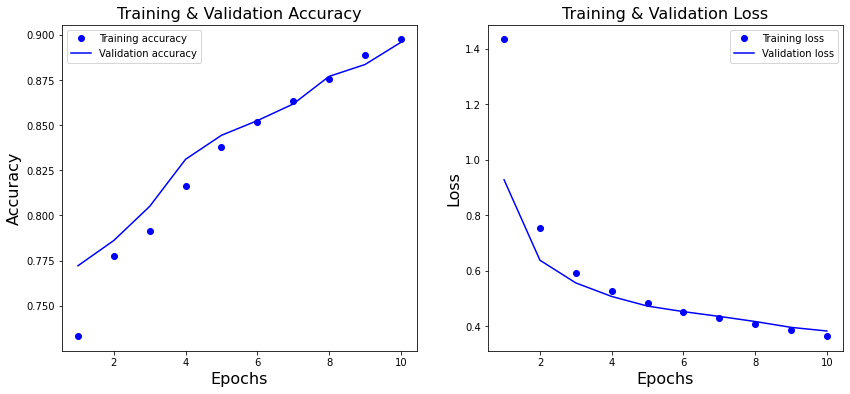

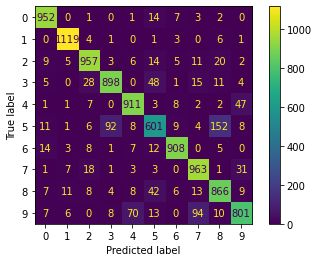

Accuracy
Label 0: 97.14 %
Label 1: 98.59 %
Label 2: 92.73 %
Label 3: 88.91 %
Label 4: 92.77 %
Label 5: 67.38 %
Label 6: 94.78 %
Label 7: 93.68 %
Label 8: 88.91 %
Label 9: 79.39 %
------------------------------------------------------------------------------------
313/313 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9723
To activation fuction =  tanh  :
Loss: 0.09
Accuracy:  97.23 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.97       958
           7       0.96      0.98      0.97      1028
           8       0.95      0.97      0.9

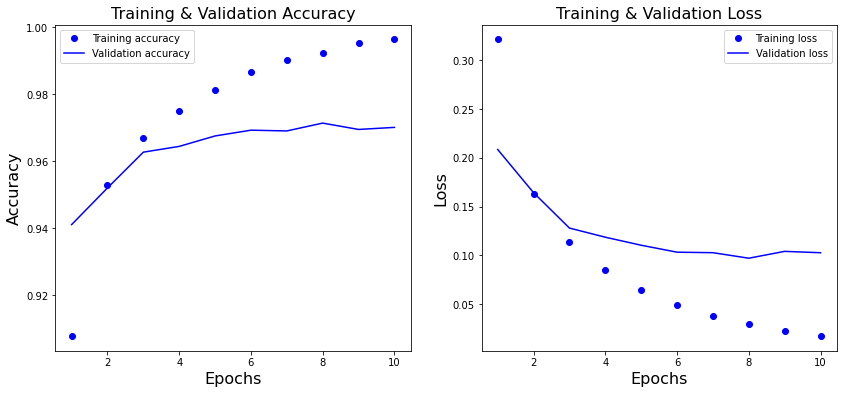

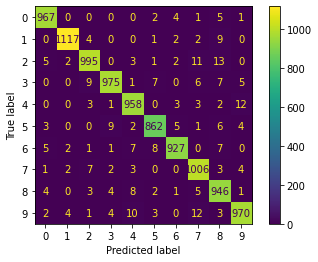

Accuracy
Label 0: 98.67 %
Label 1: 98.41 %
Label 2: 96.41 %
Label 3: 96.53 %
Label 4: 97.56 %
Label 5: 96.64 %
Label 6: 96.76 %
Label 7: 97.86 %
Label 8: 97.13 %
Label 9: 96.13 %
------------------------------------------------------------------------------------


In [ ]:
activation_list = ['relu', 'sigmoid', 'softmax', 'tanh']
for i in activation_list:
  activationFunctionExperiment(i)
  print('------------------------------------------------------------------------------------')

###Análise de resultados

A partir dos resultados obtidos, a função de ativação que performou melhor foi a função *ReLU*, destacando-se por ser linear e favorecendo o cálculo das derivadas parciais.



### Algoritmo de Aprendizagem
#### Adam, RMSProp e SGD

Gradientes são funções que podem explodir ou esvanecer, na seção anterior, comentamos sobre o "vanishing gradient". que é um dos problemas que podem ocorrer na atualização dos valores dos pesos.

Nesse experimento, iremos variar os algoritmos de atualização na etapa de backpropagation.

Iremos explorar o Adam, RMSProp e Gradiente descendente estocástico(SGD).


In [ ]:
def optimizerAlgorithmExperiment(model,optimizer,x_train = x_train,shape = input_shape,num_class = num_class, y_train = y_train, x_test = x_test, y_test = y_test, batch_size = batch_size,epochs = epochs, validation_split = val_split, verbose = verbose):
  model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = 'accuracy')
  history_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = val_split, verbose = verbose)
  eval = model.evaluate(x_test, y_test)
  print("To optimizer = ",optimizer," :")
  print(("Loss: {percentage:.2f}").format(percentage=eval[0]))
  print(("Accuracy:  {percentage:.2f} %").format(percentage=100*(eval[1])))
  historyPlot(model, history_model.history, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.2036 - accuracy: 0.9408
To optimizer =  sgd  :
Loss: 0.20
Accuracy:  94.08 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.90      0.95      0.92      1010
           4       0.93      0.95      0.94       982
           5       0.96      0.88      0.92       892
           6       0.94      0.95      0.95       958
           7       0.96      0.93      0.94      1028
           8       0.93      0.91      0.92       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



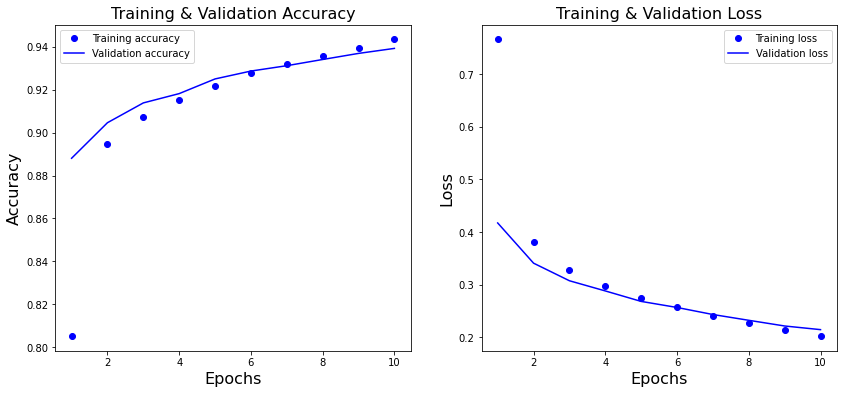

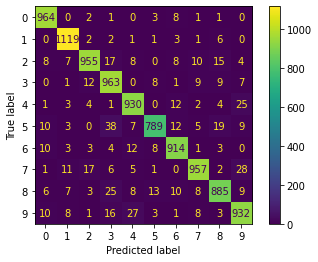

Accuracy
Label 0: 98.37 %
Label 1: 98.59 %
Label 2: 92.54 %
Label 3: 95.35 %
Label 4: 94.70 %
Label 5: 88.45 %
Label 6: 95.41 %
Label 7: 93.09 %
Label 8: 90.86 %
Label 9: 92.37 %
------------------------------------------------------------------------------------
313/313 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9759
To optimizer =  rmsprop  :
Loss: 0.10
Accuracy:  97.59 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.97      0.97     

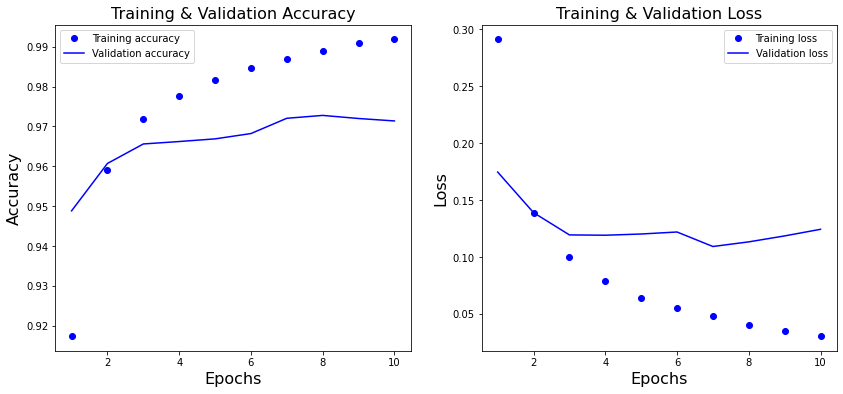

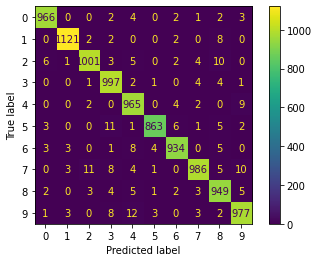

Accuracy
Label 0: 98.57 %
Label 1: 98.77 %
Label 2: 97.00 %
Label 3: 98.71 %
Label 4: 98.27 %
Label 5: 96.75 %
Label 6: 97.49 %
Label 7: 95.91 %
Label 8: 97.43 %
Label 9: 96.83 %
------------------------------------------------------------------------------------
313/313 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9765
To optimizer =  adam  :
Loss: 0.08
Accuracy:  97.65 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.97       9

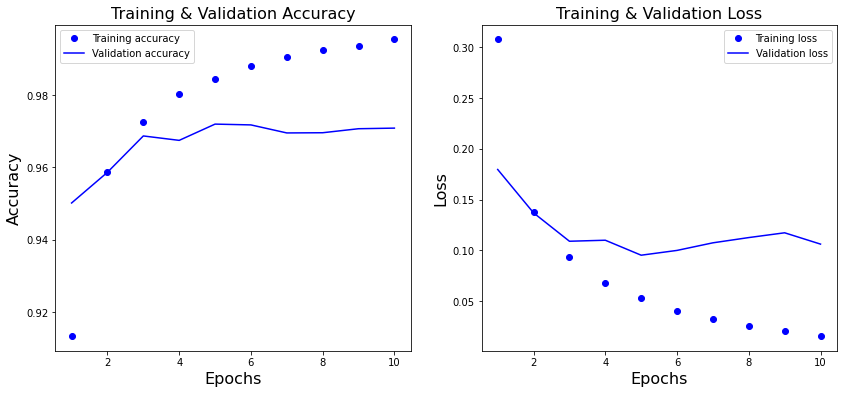

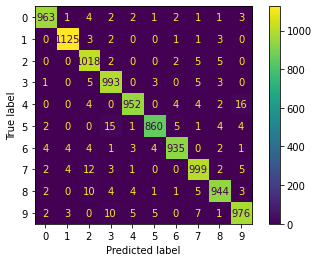

Accuracy
Label 0: 98.27 %
Label 1: 99.12 %
Label 2: 98.64 %
Label 3: 98.32 %
Label 4: 96.95 %
Label 5: 96.41 %
Label 6: 97.60 %
Label 7: 97.18 %
Label 8: 96.92 %
Label 9: 96.73 %
------------------------------------------------------------------------------------


In [ ]:
optimizer_list = ['sgd', 'rmsprop', 'adam']
for i in optimizer_list:
  optimizerAlgorithmExperiment(keras.Sequential([
     keras.Input(shape=input_shape), 
     layers.Flatten(),
     layers.Dense(128, activation = 'relu'),
     layers.Dense(num_class, activation = 'softmax')]), i)
  print('------------------------------------------------------------------------------------')

####Análise de resultados

Dos algoritmos de otimização, o Adam se saiu melhor otimizando o modelo. Por ele ser um algoritmo que extende as características do SGD e RMSProp.


### Dropout
#### $0.1, 0.2, 0.3, 0.4$, 0.5$ e $0.8$

A técnica de dropout consiste no descarte de nós aleatórios entre camadas do modelo. Essa técnica é utilizada para evitar o overfitting dos dados, quando o modelo não é preciso com dados não vistos. Optamos por testar a acurácia e loss para valores entre $[0.1, 0.5]$ com passo $0.1$, e um testo isolado com valoração $0.8$.

Aplicamos o dropout entre a camada de input e a camada intermediária.

In [ ]:
def dropoutExperiment(drop_val,x_train = x_train,shape = input_shape,num_class = num_class, y_train = y_train, x_test = x_test, y_test = y_test, batch_size = batch_size,epochs = epochs, validation_split = val_split, verbose = verbose):
  model = keras.Sequential([
     keras.Input(shape=input_shape), 
     layers.Flatten(), 
     layers.Dropout(drop_val), 
     layers.Dense(128, activation = 'relu'),
     layers.Dense(num_class, activation = 'softmax')                     
  ])
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
  history_model = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = val_split, verbose = verbose)
  eval = model.evaluate(x_test, y_test)
  print(("Loss: {percentage:.2f}").format(percentage=eval[0]))
  print(("Accuracy:  {percentage:.2f} %").format(percentage=100*(eval[1])))
  historyPlot(model, history_model.history, y_test)




Dropout value:  0.1
313/313 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9779
Loss: 0.08
Accuracy:  97.79 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.97      0.96       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



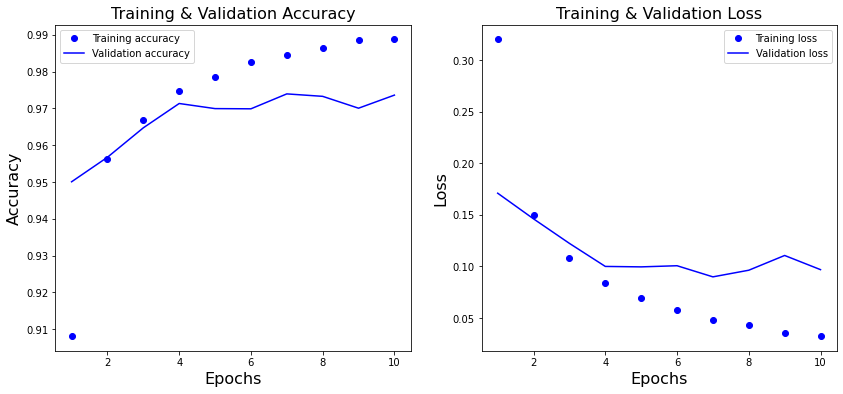

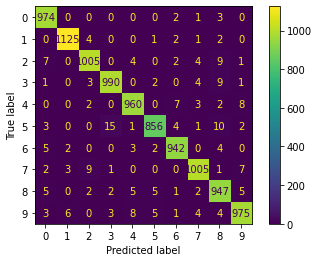

Accuracy
Label 0: 99.39 %
Label 1: 99.12 %
Label 2: 97.38 %
Label 3: 98.02 %
Label 4: 97.76 %
Label 5: 95.96 %
Label 6: 98.33 %
Label 7: 97.76 %
Label 8: 97.23 %
Label 9: 96.63 %
------------------------------------------------------------------------------------
Dropout value:  0.2
313/313 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9779
Loss: 0.07
Accuracy:  97.79 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.98       974
 

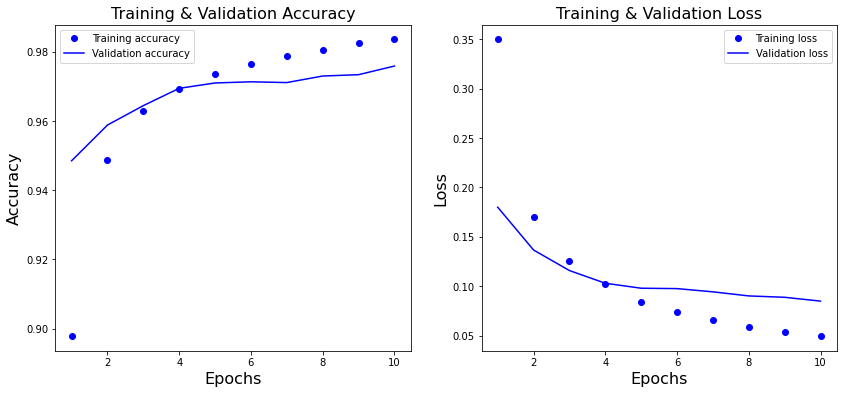

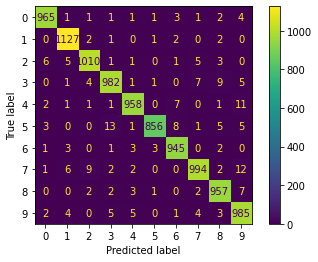

Accuracy
Label 0: 98.47 %
Label 1: 99.30 %
Label 2: 97.87 %
Label 3: 97.23 %
Label 4: 97.56 %
Label 5: 95.96 %
Label 6: 98.64 %
Label 7: 96.69 %
Label 8: 98.25 %
Label 9: 97.62 %
------------------------------------------------------------------------------------
Dropout value:  0.3
313/313 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9770
Loss: 0.07
Accuracy:  97.70 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.97      0.98      0.98       974
 

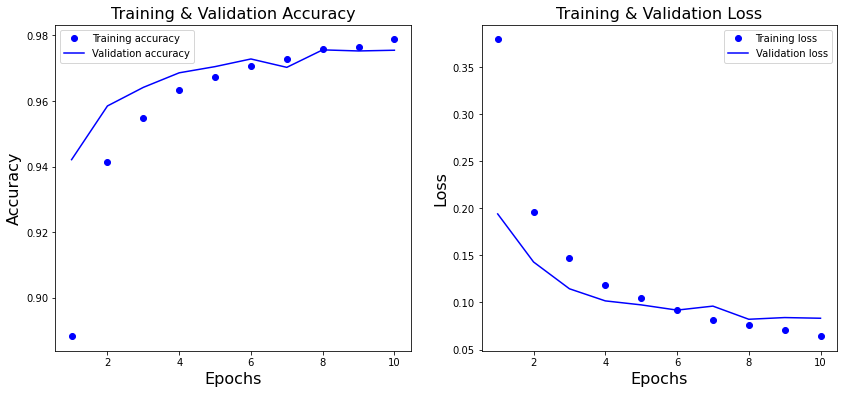

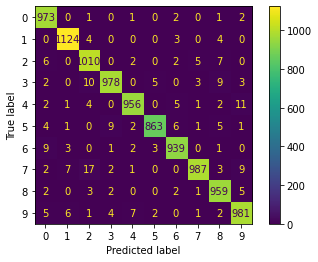

Accuracy
Label 0: 99.29 %
Label 1: 99.03 %
Label 2: 97.87 %
Label 3: 96.83 %
Label 4: 97.35 %
Label 5: 96.75 %
Label 6: 98.02 %
Label 7: 96.01 %
Label 8: 98.46 %
Label 9: 97.22 %
------------------------------------------------------------------------------------
Dropout value:  0.4
313/313 [==============================] - 1s 2ms/step - loss: 0.0740 - accuracy: 0.9772
Loss: 0.07
Accuracy:  97.72 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.96      0.97       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.98      0.97      0.97       974
 

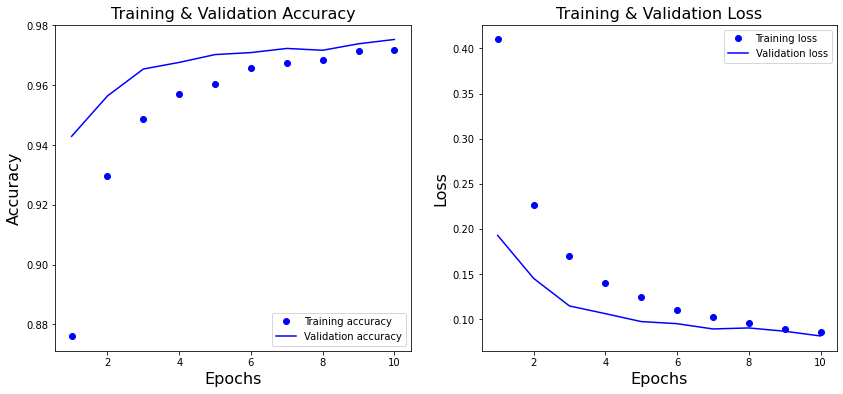

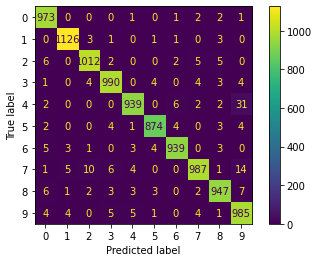

Accuracy
Label 0: 99.29 %
Label 1: 99.21 %
Label 2: 98.06 %
Label 3: 98.02 %
Label 4: 95.62 %
Label 5: 97.98 %
Label 6: 98.02 %
Label 7: 96.01 %
Label 8: 97.23 %
Label 9: 97.62 %
------------------------------------------------------------------------------------
Dropout value:  0.5
313/313 [==============================] - 1s 2ms/step - loss: 0.0796 - accuracy: 0.9743
Loss: 0.08
Accuracy:  97.43 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.94      0.98      0.96       974
 

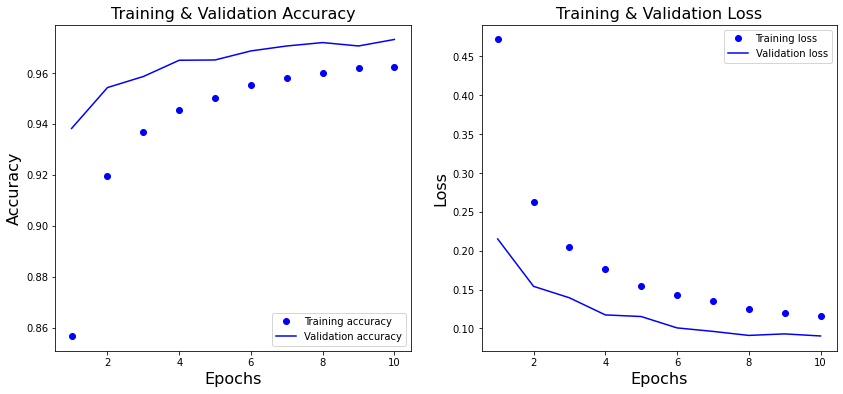

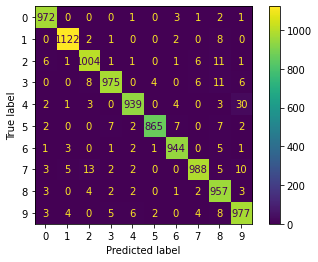

Accuracy
Label 0: 99.18 %
Label 1: 98.85 %
Label 2: 97.29 %
Label 3: 96.53 %
Label 4: 95.62 %
Label 5: 96.97 %
Label 6: 98.54 %
Label 7: 96.11 %
Label 8: 98.25 %
Label 9: 96.83 %
------------------------------------------------------------------------------------
Dropout value:  0.8
313/313 [==============================] - 1s 2ms/step - loss: 0.1422 - accuracy: 0.9560
Loss: 0.14
Accuracy:  95.60 %
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.96      0.95      0.95      1010
           4       0.99      0.91      0.95       982
           5       0.99      0.94      0.96       892
           6       0.96      0.98      0.97       958
           7       0.98      0.93      0.95      1028
           8       0.90      0.97      0.93       974
 

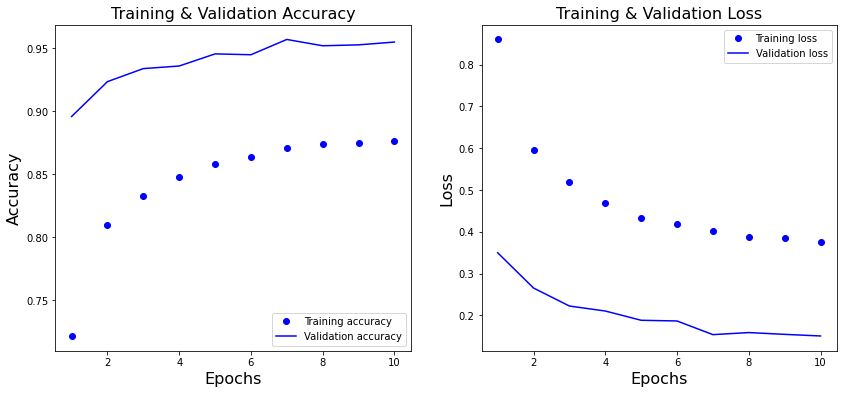

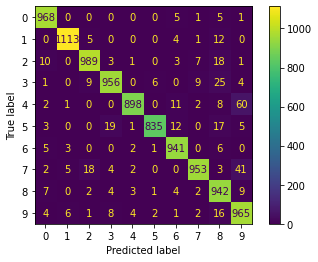

Accuracy
Label 0: 98.78 %
Label 1: 98.06 %
Label 2: 95.83 %
Label 3: 94.65 %
Label 4: 91.45 %
Label 5: 93.61 %
Label 6: 98.23 %
Label 7: 92.70 %
Label 8: 96.71 %
Label 9: 95.64 %
------------------------------------------------------------------------------------


In [ ]:
dropout_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.8]
for i in dropout_list:
  print("Dropout value: ", format(i))
  dropoutExperiment(i)
  print('------------------------------------------------------------------------------------')

###Análise de resultado

A partir dos resultados obtidos, percebe-se que um dropout de 80% confere uma pior poerfomance de acertividade no modelo, constituindo uma pior acurácia. Em consonância, valores menores projetam uma maior acurácia, provendo melhor recall e precisão.